In [1]:
!nvidia-smi

Thu Nov 23 14:48:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!pip install tensorflow

In [7]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [8]:


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [9]:

IMAGE_SIZE = [224, 224]

train_path = "/content/drive/MyDrive/dataset (1)/train"
valid_path = "/content/drive/MyDrive/dataset (1)/test"

In [10]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 1s 0us/step


In [11]:
for layer in inception.layers:
    layer.trainable = False

In [12]:
folders = glob('/content/drive/MyDrive/dataset (1)/train/*')

In [13]:
folders

['/content/drive/MyDrive/dataset (1)/train/mouse',
 '/content/drive/MyDrive/dataset (1)/train/laptop',
 '/content/drive/MyDrive/dataset (1)/train/mobile',
 '/content/drive/MyDrive/dataset (1)/train/router',
 '/content/drive/MyDrive/dataset (1)/train/keyboard',
 '/content/drive/MyDrive/dataset (1)/train/monitor']

In [14]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)


model = Model(inputs=inception.input, outputs=prediction)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset (1)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 843 images belonging to 6 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset (1)/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 98 images belonging to 6 classes.


In [20]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


<ipython-input-20-f9065b9fed66>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25
53/53 [==============================] - 228s 4s/step - loss: 0.9851 - accuracy: 0.9110 - val_loss: 0.3571 - val_accuracy: 0.9592
Epoch 2/25
53/53 [==============================] - 46s 857ms/step - loss: 0.4594 - accuracy: 0.9549 - val_loss: 1.5798 - val_accuracy: 0.8878
Epoch 3/25
53/53 [==============================] - 46s 870ms/step - loss: 0.3808 - accuracy: 0.9680 - val_loss: 0.8852 - val_accuracy: 0.9286
Epoch 4/25
53/53 [==============================] - 46s 868ms/step - loss: 0.6198 - accuracy: 0.9585 - val_loss: 0.8536 - val_accuracy: 0.9694
Epoch 5/25
53/53 [==============================] - 46s 862ms/step - loss: 0.1171 - accuracy: 0.9858 - val_loss: 0.7316 - val_accuracy: 0.9694
Epoch 6/25
53/53 [==============================] - 46s 863ms/step - loss: 0.2569 - accuracy: 0.9775 - val_loss: 3.5880 - val_accuracy: 0.8673
Epoch 7/25
53/53 [==============================] - 47s 896ms/step - loss: 0.5409 - accuracy: 0.9703 - val_loss: 3.3433 - val_accuracy: 0.8673
E

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


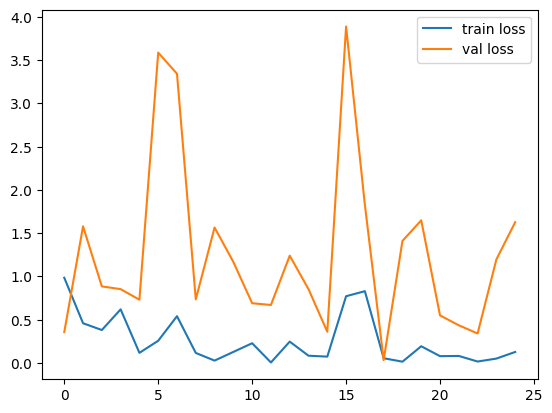

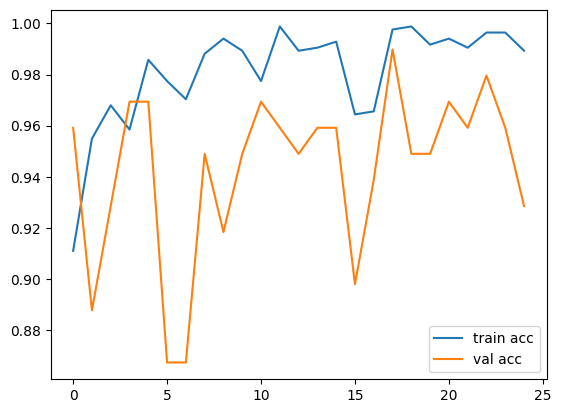

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
